<a href="https://colab.research.google.com/github/Minch13r/DeepLearn/blob/main/5%EC%A3%BC%EC%B0%A8_1st.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

라이브러리 및 데이터 로드

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/diabetes.csv"
data = pd.read_csv(url)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

특성과 타겟 분리

In [9]:
X = data.drop('Outcome', axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
Y = data['Outcome']
Y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


데이터 전처리

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

주성분 2개로 축소

In [14]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

시각화 및 비율 출력

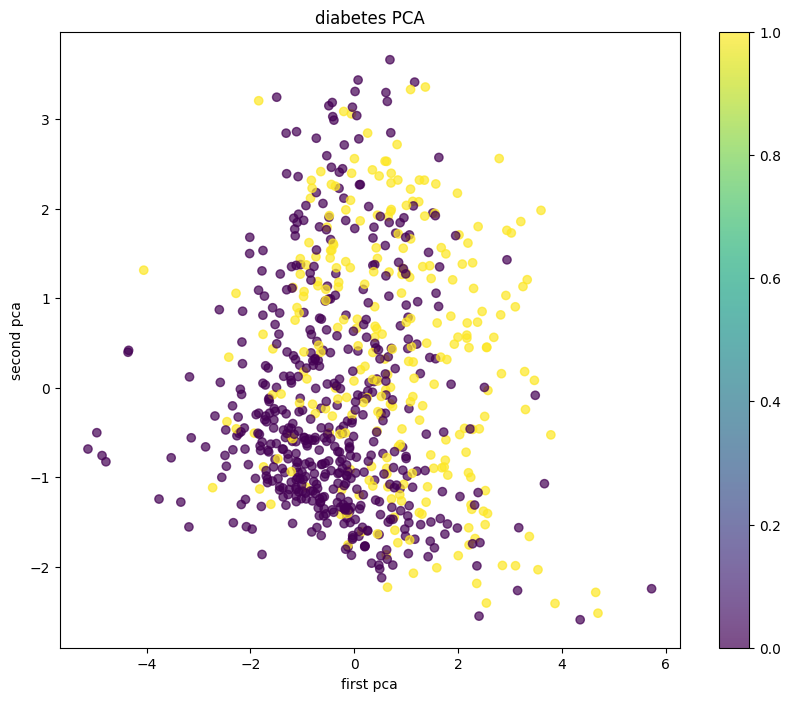

설명된 분산 비율: [0.26179749 0.21640127]
누적 설명된 분산 비율: [0.26179749 0.47819876]


In [17]:
# 결과 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('first pca')
plt.ylabel('second pca')
plt.title('diabetes PCA')
plt.show()

# 설명된 분산 비율 출력
print("설명된 분산 비율:", pca.explained_variance_ratio_)
print("누적 설명된 분산 비율:", np.cumsum(pca.explained_variance_ratio_))